# Sentiment Calculator

##### Introduction
- Two types of Sentiment Analyzer libraries - ***TextBlob*** and ***vaderSentiment*** have been used.
> With the help of these libraries sentiments of all the tweets are calculated.

- Clean up of tweet text is done here to :
> Remove all the URL's and punctuation

In [3]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt


In [2]:
from textblob import TextBlob
# import sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
tweet_df = pd.read_csv('../data/TwitterData/2019/combine/climateTwitterData_Updated.csv')
tweet_df = tweet_df[tweet_df['text'].notna()]

In [4]:
print(tweet_df.shape);tweet_df.head()

(72405, 15)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [5]:
tweet_df.groupby('search_hashtags')['id'].count()

search_hashtags
#actonclimate         1895
#bushfires             899
#climateaction        6378
#climatechange       16190
#climatecrisis        4982
#climatestrike       18355
#environment          4703
#fridaysforfuture     3038
#globalwarming        4152
#greennewdeal         4589
#savetheplanet        1434
#sustainability       5790
Name: id, dtype: int64

***HELPER FUNCTION***
Helps to remove urls from the tweet texts and replaced by empty string.

In [6]:
def replace_urls(in_string, replacement=None):
    # """Replace URLs in strings. See also: ``bit.ly/PyURLre``

    # Args:
    #     in_string (str): string to filter
    #     replacement (str or None): replacment text. defaults to '<-URL->'

    # Returns:
    #     str
    # """
    replacement = '<-URL->' if replacement is None else replacement
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, in_string)

_***Once the tweets have been cleaned of all the urls, punctuation is next removed and replaces by empty string.***_

In [7]:
clean_url_df = tweet_df

clean_url_df['text_clean'] = [replace_urls(text,"") for text in clean_url_df['text']]
#remove punctuations
RE_PUNCTUATION = '|'.join([re.escape(x) for x in string.punctuation])  
clean_url_df['text_clean'] = clean_url_df['text_clean'].str.replace(RE_PUNCTUATION, "")

In [8]:
print(clean_url_df.shape);clean_url_df.head()

(72405, 16)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location,text_clean
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA",2020 is the year we votethemout the year we cl...
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA",Winter has not stopped this group of dedicated...
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA",WEEK 55 of ClimateStrike at the UN Next week F...
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA",A year of resistance as youth protests shaped...
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA",HAPPY HOLIDAYS greta gretathunberg climatecha...


### TEXT BLOB Analysis

Analyzes the sentiments of all tweets. It gives polarity and subjectivity of each tweet text.
#. **positive sentiment**:  polarity >= 0
#. **negative sentiment**:  polarity < 0


In [9]:
# Create textblob objects of the tweets
list_sentiment_polarity = []
list_sentiment_subjectivity = []
# list_sentiment_object = []
list_sentiment = []


for tweet in clean_url_df['text_clean']:
    
#     print(tweet)
    sentiment_objects = TextBlob(tweet)
    polarity = sentiment_objects.polarity
    if  polarity >= 0:
        list_sentiment.append('positive')
    else:
        list_sentiment.append('negative')
    list_sentiment_polarity.append(polarity)
    
    list_sentiment_subjectivity.append(sentiment_objects.subjectivity)
#     list_sentiment_object.append((str(sentiment_objects)))
#     print(sentiment_objects)
    
    
clean_url_df["tb_sentiment_polarity"] = list_sentiment_polarity
clean_url_df["tb_sentiment_subjectivity"] = list_sentiment_subjectivity
# clean_url_df["sentiment_text"] = list_sentiment_object
clean_url_df["textBlob_sentiment"] = list_sentiment


clean_url_df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location,text_clean,tb_sentiment_polarity,tb_sentiment_subjectivity,textBlob_sentiment
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA",2020 is the year we votethemout the year we cl...,-0.100000,0.462500,negative
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA",Winter has not stopped this group of dedicated...,0.000000,0.000000,positive
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA",WEEK 55 of ClimateStrike at the UN Next week F...,0.166667,0.333333,positive
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA",A year of resistance as youth protests shaped...,0.183333,0.600000,positive
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA",HAPPY HOLIDAYS greta gretathunberg climatecha...,0.650000,0.800000,positive


###  VADER (Valence Aware Dictionary and sEntiment Reasoner) 
> is a lexicon and rule-based sentiment analysis tool that is *specifically attuned to sentiments expressed in social media*. 

This scoring will be used in visualtizations
====================================
About the Scoring
==================

* The ``compound`` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative.
Typical threshold values (used in the literature cited on this page) are:

#. **positive sentiment**: ``compound`` score >= 0.05
#. **neutral sentiment**: (``compound`` score > -0.05) and (``compound`` score < 0.05)
#. **negative sentiment**: ``compound`` score <= -0.05

#. References -- https://github.com/cjhutto/vaderSentiment#about-the-scoring  

In [10]:
#initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
vader_sentiment = []
for tweet in clean_url_df['text_clean']:
    scores = analyzer.polarity_scores(tweet)
    compound_list.append(scores["compound"])            
    positive_list.append(scores["pos"]) 
    negative_list.append(scores["neg"]) 
    neutral_list.append(scores["neu"])
    
    if scores['compound'] >= 0.05:
        vader_sentiment.append('Positive')
    elif scores['compound'] > -0.05 and scores['compound'] < 0.05:
         vader_sentiment.append('Neutral')
    elif scores['compound'] <= -0.05:
        vader_sentiment.append('Negative')
        
clean_url_df["vader_compound"] = compound_list
clean_url_df["vader_pos"] = positive_list
clean_url_df["vader_neg"] = negative_list
clean_url_df["vader_neu"] = neutral_list
clean_url_df["V_Sentiment"] = vader_sentiment

RESULTS
========

#. saving the results in the .csv(comma seprated) file, and later implement machine learning models on it.

In [11]:
clean_url_df.to_csv('../data/graphAnalysis/clean_climateTwitterData.csv', index=False)

## AVG Vader Compound

#. Calculating the average score of the compound score based on hashtags and plot it on the graph to visualize which hashtag is trending positive and which ones are negative.

In [12]:
term_search_df = clean_url_df.groupby('search_hashtags')
compounds = clean_url_df["vader_compound"]
df_avg_sentiment = pd.DataFrame(term_search_df["vader_compound"].mean())

df_avg_sentiment.reset_index(inplace=True)
df_avg_sentiment.to_csv('../data/graphAnalysis/avg_sentiment_hashtags_climateTwitterData.csv', index=False)
df_avg_sentiment.head()

,search_hashtags,vader_compound
0,#actonclimate,0.231736
1,#bushfires,-0.061686
2,#climateaction,0.237549
3,#climatechange,0.082365
4,#climatecrisis,0.060259


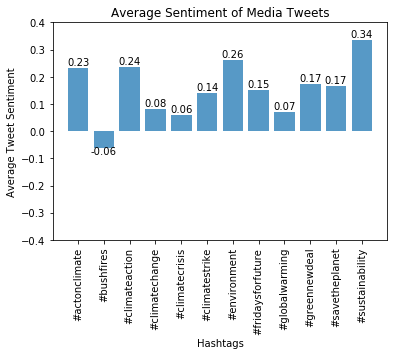

In [13]:
tick_locations = range(len(df_avg_sentiment))
plt.bar(tick_locations, df_avg_sentiment["vader_compound"], alpha=0.75)
plt.title(f"Average Sentiment of Media Tweets")
plt.xlabel("Hashtags")
plt.ylabel("Average Tweet Sentiment")
plt.xticks(tick_locations, df_avg_sentiment["search_hashtags"], rotation='vertical')
plt.ylim(-0.4,0.4)
for i in range(len(df_avg_sentiment)):
    if df_avg_sentiment["vader_compound"][i] > 0:
        plt.text(tick_locations[i],df_avg_sentiment["vader_compound"][i] + 0.01,"{0:.2f}".format(df_avg_sentiment["vader_compound"][i]), ha="center")
    else:
        plt.text(tick_locations[i],df_avg_sentiment["vader_compound"][i] - 0.025,"{0:.2f}".format(df_avg_sentiment["vader_compound"][i]), ha="center")

plt.savefig("../data/graphAnalysis/hashtag_average_sentiment.png")
plt.show()

## AVG Vader Compound

#. Calculating the average score of the compound score based on locations and plot it 
on the graph to visualize which location is trending positive and which ones are negative.

In [14]:
term_location_df = clean_url_df.groupby('location')
compounds = clean_url_df["vader_compound"]
df_avg_loc_sentiment = pd.DataFrame(term_location_df["vader_compound"].mean())

df_avg_loc_sentiment.reset_index(inplace=True)
df_avg_loc_sentiment.to_csv('../data/graphAnalysis/avg_sentiment_location_climateTwitterData.csv', index=False)

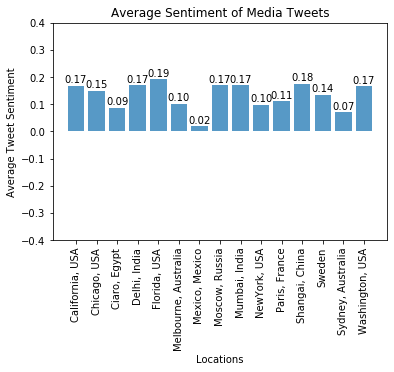

In [15]:
tick_locations = range(len(df_avg_loc_sentiment))
plt.bar(tick_locations, df_avg_loc_sentiment["vader_compound"], alpha=0.75)
plt.title(f"Average Sentiment of Media Tweets")
plt.xlabel("Locations")
plt.ylabel("Average Tweet Sentiment")
plt.xticks(tick_locations, df_avg_loc_sentiment["location"], rotation='vertical')
plt.ylim(-0.4,0.4)
for i in range(len(df_avg_loc_sentiment)):
    if df_avg_loc_sentiment["vader_compound"][i] > 0:
        plt.text(tick_locations[i],df_avg_loc_sentiment["vader_compound"][i] + 0.01,"{0:.2f}".format(df_avg_loc_sentiment["vader_compound"][i]), ha="center")
    else:
        plt.text(tick_locations[i],df_avg_loc_sentiment["vader_compound"][i] - 0.025,"{0:.2f}".format(df_avg_loc_sentiment["vader_compound"][i]), ha="center")

plt.savefig("../data/graphAnalysis/location_average_sentiment.png")
plt.show()

In [16]:
clean_url_df['search_hashtags'].value_counts()


#climatestrike       18355
#climatechange       16190
#climateaction        6378
#sustainability       5790
#climatecrisis        4982
#environment          4703
#greennewdeal         4589
#globalwarming        4152
#fridaysforfuture     3038
#actonclimate         1895
#savetheplanet        1434
#bushfires             899
Name: search_hashtags, dtype: int64

In [17]:
clean_url_df.isnull().sum()

Unnamed: 0                       0
id                               0
author_id                        0
text                             0
retweets                         0
permalink                        0
date                             0
formatted_date                   0
favorites                        0
mentions                     44851
hashtags                         3
geo                          72405
urls                         39056
search_hashtags                  0
location                         0
text_clean                       0
tb_sentiment_polarity            0
tb_sentiment_subjectivity        0
textBlob_sentiment               0
vader_compound                   0
vader_pos                        0
vader_neg                        0
vader_neu                        0
V_Sentiment                      0
dtype: int64